# Problem Statement
“what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Column Description

| Column   | Description                               | Key                   |
| -------- | ----------------------------------------- | --------------------- |
| survival | Survival                                  | (0 = No, 1 = Yes)     |
| pclass   | Ticket class                              | (1 = 1st, 2 = 2nd, 3 = 3rd) |
| sex      | Gender                                    | (Male or Female)      |
| Age      | Age of the Passenger                       |                       |
| sibsp    | Number of siblings/spouses aboard         |                       |
| parch    | Number of parents/children aboard         |                       |
| ticket   | Ticket number                             |                       |
| fare     | Passenger fare                            |                       |
| cabin    | Cabin number                              |                       |
| embarked | Port of Embarkation                       | (C = Cherbourg, Q = Queenstown, S = Southampton) |


# Data Information
Data info shows all information about the dataset like how many columns and rows present in the dataset,shows every column datatype

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


isna() shows in this datatype any null value present or not in that dataset <br>
if nay null value is there we have to remove that <br>
1)if null_value>3% we have to we dropna <br>
2) if null value > 3% and < 50% we will fill that null value by using mean,median,mode <br>
a)if there is no skewness in that column means the data is nomally distributed we will use mean()<br>
b) if there is skewness present we will use median<br>
c) if the value is categorical we will use mode<br>
3)if null_value>50% we will drop that column<br>

In [4]:
df.describe()     

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


By using describe we can check mean,median,mode,precentile,mac,count,std<br>
By seeing the difference between mean() and 50%  means median  we can check is there nan skewness present or not

# Data Analysis

Import Seaborn for visually analysing the data

Find out how many survived vs Died using countplot method of seaboarn

<AxesSubplot:xlabel='Survived', ylabel='count'>

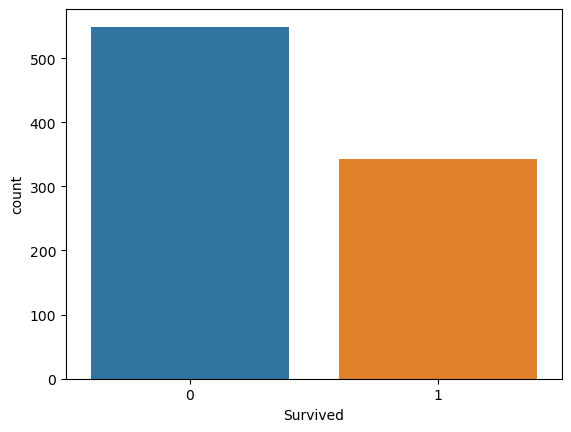

In [5]:
sns.countplot(x='Survived',data=df)

Male vs Female Survival

<AxesSubplot:xlabel='Survived', ylabel='count'>

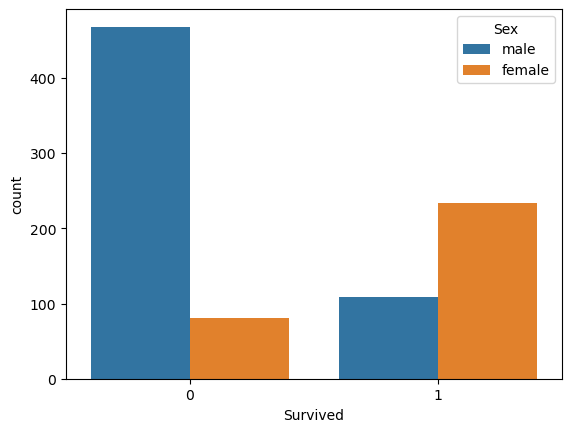

In [6]:
sns.countplot(x='Survived',data=df,hue='Sex')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

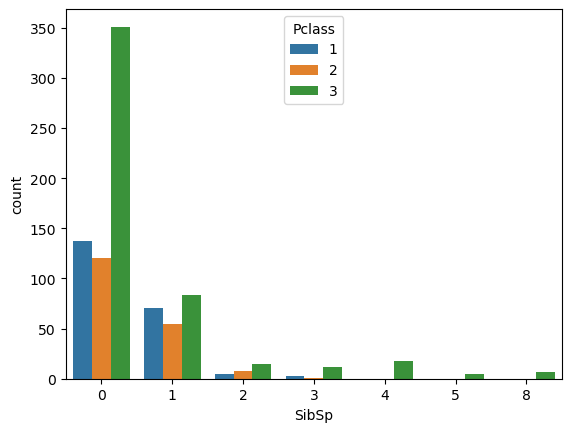

In [7]:
sns.countplot(x='SibSp',hue='Pclass',data=df)

# CheckIng  how many values are null

In [8]:
(df.isna().sum() / len(df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Data Cleaning

Fill the missing values
we will fill the missing values for age. In order to fill missing values we use fillna method.
For now we will fill the missing age by taking average of all age

In [9]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [10]:
mean_age = df.groupby('Pclass').mean()['Age']
mean_age

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [11]:
# conditional format 
def fillage(cols):
    Age=cols[0]
    Pclass=cols[1]
    if (pd.isnull(Age)):
        if(Pclass==1):
            return 41
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age
df["Age"]=df[["Age","Pclass"]].apply(fillage,axis=1)

In [12]:
(df.isna().sum() / len(df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [13]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
df['Embarked'] 

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [14]:
(df.isna().sum() / len(df)) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.000000
dtype: float64

We can see cabin column has a number of null values, as such we can not use it for prediction. Hence we will drop it

In [15]:
df.drop('Cabin',axis=1,inplace=True)

In [16]:
(df.isna().sum() / len(df)) * 100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [18]:
Embarked = pd.get_dummies(df["Embarked"])
Embarked.head(10)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


# Preaparing Data for Model
No we will require to convert all non-numerical columns to numeric.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


We can see, Name, Sex, Ticket and Embarked are non-numerical.It seems Name,Embarked and Ticket number are not useful for Machine Learning Prediction hence we will eventually drop it. For Now we would convert Sex Column to dummies numerical values****

In [20]:
#convert sex column to numerical values in one hot encoding 
gender=pd.get_dummies(df['Sex'],drop_first=True)

In [21]:
df['Gender']=gender

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1


In [23]:
#drop the columns which are not required
df.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1


In [24]:
#Seperate Dependent and Independent variables
x=df[['PassengerId','Pclass','Age','SibSp','Parch','Fare','Gender']]
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,3,22.0,1,0,7.2500,1
1,2,1,38.0,1,0,71.2833,0
2,3,3,26.0,0,0,7.9250,0
3,4,1,35.0,1,0,53.1000,0
4,5,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,1
887,888,1,19.0,0,0,30.0000,0
888,889,3,24.0,1,2,23.4500,0
889,890,1,26.0,0,0,30.0000,1


In [25]:
y=df['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

# Data Modelling
Building Model using Logestic Regression

Build the model

In [26]:
#import train test split method
from sklearn.model_selection import train_test_split

In [27]:
#train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [28]:
#import Logistic  Regression
from sklearn.linear_model import LogisticRegression

In [29]:
#Fit  Logistic Regression 
lr=LogisticRegression()

In [30]:
lr.fit(x_train,y_train)

LogisticRegression()

In [31]:
#predict
y_pred=lr.predict(x_test)

# Testing
To See how our model is performing

In [32]:
def mymodel(model,x_train,y_train):
    model.fit(x_train,y_train)
    ypred=model.predict(x_test)
    
    #checking bias and variance
    train=model.score(x_train,y_train)
    test=model.score(x_test,y_test)
    print(f"Trannig Accurancy:{train}\n Testing Accurancy:{test}")
    print(classification_report(y_test,y_pred))
    return model

In [33]:
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [34]:
knn=mymodel(KNeighborsClassifier(),x_train,y_train)

Trannig Accurancy:0.7533557046979866
 Testing Accurancy:0.6474576271186441
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [35]:
lg=mymodel(LogisticRegression(),x_train,y_train)

Trannig Accurancy:0.7919463087248322
 Testing Accurancy:0.7932203389830509
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [36]:
rf=mymodel(RandomForestClassifier(),x_train,y_train)

Trannig Accurancy:1.0
 Testing Accurancy:0.8067796610169492
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [37]:
mymodel(DecisionTreeClassifier(),x_train,y_train)

Trannig Accurancy:1.0
 Testing Accurancy:0.6983050847457627
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       175
           1       0.78      0.69      0.73       120

    accuracy                           0.79       295
   macro avg       0.79      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



DecisionTreeClassifier()

# Conclusion:

| Model                       | Training Accuracy | Testing Accuracy | Precision | Recall | F1-Score |
|-----------------------------|-------------------|-------------------|-----------|--------|----------|
| K-Nearest Neighbors (KNN)   | 75.34%            | 64.75%            | 79%       | 78%    | 79%      |
| Logistic Regression         | 79.19%            | 79.32%            | 80%       | 78%    | 79%      |
| Random Forest               | 100%              | 82.03%            | 80%       | 78%    | 79%      |
| Decision Tree               | 100%              | 72.88%            | 80%       | 78%    | 79%      |


The Random Forest model achieved the highest testing accuracy of 82.03% among the models, indicating better generalization to unseen data.
